Model for Cm-based growth rate hits from 10.1126/science.1237435

## Various numbers
* Andrew uses 60ng/uL chloramphenicol and lower for selections
    * this is 180uM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import pandas as pd

import matplotlib
matplotlib.rc('figure', dpi = 150)

## Plot expected growth rates for different values of CAT and Cm

In [ ]:
def aext_calc(a_int,cat):
    
    # Define all the parameters
    i_50 = 5.5
    k_m = 12
    
    # Calculate external antibiotic concentration
    a_ext = a_int+cat*(1/(1+a_int/i_50))*(1/(1+k_m/a_int))
    
    return a_ext

def grow_calc(a_int):
    i_50 = 5.5

    rel_grow = 1/(1+a_int/i_50)
    return rel_grow

In [ ]:
# resolution (100 is decent and fast)
res = 200

# Define the two features we're interested in
# CAT concentrations
cats = np.logspace(0,3.8,num = res)
# Externally-applied cm
a_exts = np.logspace(-1,3,num=res)

#also inputs to give it
a_ints = np.logspace(-1,3,num=res)

In [ ]:
df = pd.DataFrame(columns = ['cat', 'a_ext', 'a_int'])

Create a lookup table for inverted values because I don't know how to invert the function.

In [ ]:
for cat in cats:
    for a_int in a_ints:
        a_ext = aext_calc(a_int,cat)
        df = df.append({'cat': cat, 'a_ext': a_ext, 'a_int': a_int}, ignore_index=True)

In [ ]:
fig, ax = plt.subplots(figsize = (4,4))

a_exts_plt = [0,2.5,5,10,25,50,75,100,300,1000]

for a_ext_plt in a_exts_plt:
    
    growths = []

    # for all cat values of interest:
    for cat in cats:

        # subset df to only have given cat value
        sub_df = df[df['cat'] == cat]

        # find closest a_ext value index
        idx = sub_df['a_ext'].sub(a_ext_plt).abs().idxmin()

        #extract the a_int value
        a_int = sub_df.loc[idx]['a_int']

        # get growth rate
        growth = grow_calc(a_int)
        growths.append(growth)
        
    # plot it
    ax.scatter(cats/12,growths)


#axes = plt.gca()
ax.set_xscale('log')
ax.set_ylabel('Relative growth rate')
ax.set_xlabel('CAT activity (V_0/K_m)')
ax.legend(a_exts_plt, title = 'Cm (uM)',bbox_to_anchor=(1.01, 1), loc='upper left')


plt.show()

### Design insights
* for getting the most signal from weak hits
    * different ranges of CAT activity have different dynamic ranges of growth
        * e.g. 10-fold changes across different regions of CAT activity will have more or less growth rate changes depending on Cm applied
    * might be necessary to boost minimum expression levels to higher values and use higher concentrations of Cm to get good growth rate differences from small hits
        * could be done with: RBS tuning, promoter tuning, higher-copy plasmids
    * want the STEEPEST part of this curve (probably want to be at $\rho_c$

## Next steps
* plot the dynamic range for various 10-fold windows across CAT values and Cm values
* figure out how to invert that damn function...
* think about how bimodality will affect strong hits (they should be expressing a lot of CAT)

## Extraneous

### Check if the $a_{ext}$ function has an inverse

In [ ]:
cats = np.logspace(0,3.8,num = 10)
for cat in cats:
    out_exts = [aext_calc(a_int, cat) for a_int in a_ints]

    plt.scatter(a_ints, out_exts)
    
plt.legend(['{:.2f}'.format(i/12) for i in cats], title = 'CAT activity (units of Km)',bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Internal Cm')
plt.ylabel('External Cm')
plt.show()



Looks like it has an inverse until CAT ~= 500

### Recreate Fig 4
* to make sure I'm getting the model right

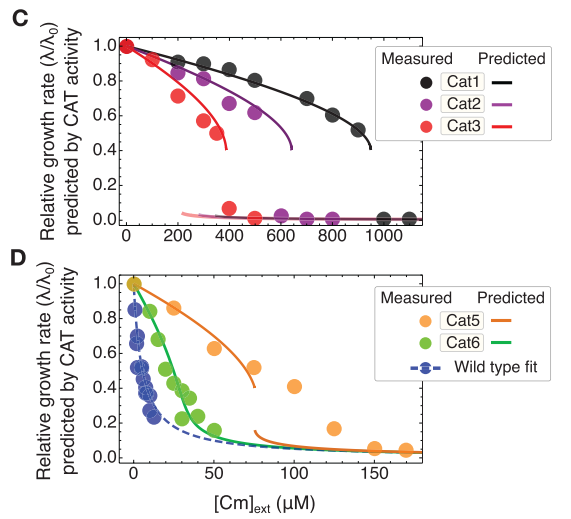

In [ ]:
# CAT activity value
cats = np.logspace(0,3.75,num = 10)
# Externally-applied cm
a_exts = np.logspace(-1,3,num=res)

for cat in cats:
    
    # get closest CAT value in df
    cat_vals = df['cat'].unique()
    idx = (np.abs(cat_vals - cat)).argmin()
    cat = cat_vals[idx]
    growths = []

    # for all a_ext values of interest:
    for a_ext in a_exts:

        # subset df to only have given cat value
        sub_df = df[df['cat'] == cat]

        # find closest a_ext value index
        idx = sub_df['a_ext'].sub(a_ext).abs().idxmin()

        #extract the a_int value
        a_int = sub_df.loc[idx]['a_int']

        # get growth rate
        growth = grow_calc(a_int)
        growths.append(growth)
        
    # plot it
    plt.scatter(a_exts,growths)
    
axes = plt.gca()
axes.set_ylabel('Relative growth rate')
axes.set_xlabel('Cm (ext)')
axes.set_xlim([0,1200])
axes.legend(cats, title = 'CAT activity',bbox_to_anchor=(1.01, 1), loc='upper left')


plt.show()

Growth is much more sensitive to Cm in my plots... look at the parameters...

## That didn't work... try Fig 1B
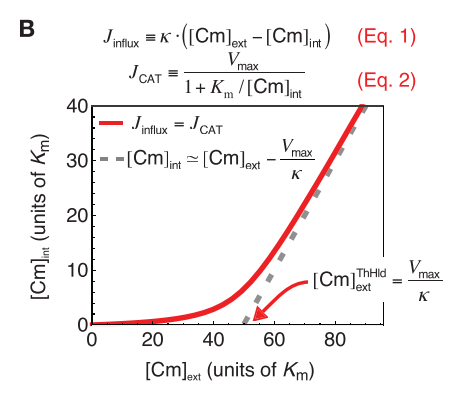

In [ ]:
# CAT activity value
cats = [0,300]
# Externally-applied cm
a_exts = np.logspace(-1,3,num=res)

for cat in cats:
    
    # get closest CAT value in df
    cat_vals = df['cat'].unique()
    idx = (np.abs(cat_vals - cat)).argmin()
    cat = cat_vals[idx]
    a_ints = []

    # for all a_ext values of interest:
    for a_ext in a_exts:

        # subset df to only have given cat value
        sub_df = df[df['cat'] == cat]

        # find closest a_ext value index
        idx = sub_df['a_ext'].sub(a_ext).abs().idxmin()

        #extract the a_int value
        a_int = sub_df.loc[idx]['a_int']

        # append to list
        a_ints.append(a_int)
        
    # plot it
    plt.scatter(a_exts,a_ints)
    
axes = plt.gca()
axes.set_ylabel('Cm (int)')
axes.set_xlabel('Cm (ext)')
axes.set_xlim([0,90])
axes.set_ylim([0,40])
axes.legend(cats, title = 'CAT activity',bbox_to_anchor=(1.01, 1), loc='upper left')


plt.show()

All CAT activities should be adjusted by 12 to fit the (units of $K_m$) plots

## Next steps
* plot the dynamic range for various 10-fold windows across CAT values and Cm values
* figure out how to invert that damn function...
    * do this by finding critical points and only inverting the function outside of them
* think about how bimodality will affect strong hits (they should be expressing a lot of CAT)

In [ ]:
np.logspace(-3,0,8)

In [ ]:
p_str = np.array([25,69,85,169,1470,4550,23000,20200,63140])
labels = ['Term', '8', '7', '6', '5', '4', '3', '2', '1']

In [ ]:
fig, ax = plt.subplots()

x = np.arange(len(p_str))  # the label locations
width = 0.35  # the width of the bars

ax.bar(x,p_str)
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Fluorescence (au)')
ax.set_xlabel('Promoter rank')

plt.show()